In [1]:
from data import *
from models import *
from utils import *
import PIL.Image as Image

In [2]:
transform = transforms.Compose([transforms.RandomAffine(degrees=20,
                                                    translate=(0.3, 0.3),
                                                       scale = (.8,1.1)),
                               transforms.ToTensor()])
# transform = transforms.ToTensor()
data = MNIST_traindata('data/', transform, train=False)
dataloader = DataLoader(data, batch_size=16, shuffle=True)

In [3]:
real_imgs, cut_imgs, labels = next(iter(dataloader))
labels = labels.float().view(-1, 1)

In [4]:
def base_loss(predicted, sketch):
    return torch.sum(nn.functional.relu(sketch - 2 * predicted)) / len(predicted)

tensor([3.])


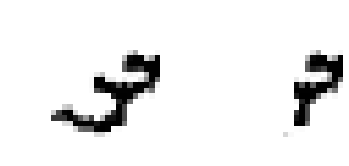

tensor(0.3742)


In [5]:
real_imgs, cut_imgs, labels = next(iter(dataloader))
labels = labels.float().view(-1, 1)
fig, axes = plt.subplots(1, 2)
i=7
axes[0].imshow(real_imgs[i].view(28,28), cmap="Greys")
axes[0].axis('off')
axes[1].imshow(cut_imgs[i].view(28,28), cmap="Greys")
axes[1].axis('off')
print(labels[i])
plt.show()
print(torch.sum(real_imgs[i] - cut_imgs[i]) / torch.sum(real_imgs[i]))
# temp = np.array(real_imgs[i])
# temp.resize(28,28)
# cv2.rectangle(temp, (0, 0), (10, 10), color=1, thickness=-1)
# plt.imshow(temp.reshape(28,28), cmap="Greys")

In [30]:
gen = Add_Skip_Generator()
# disc = Discriminator()
# disc_using_sketch
gen.load_state_dict(torch.load('models/addition_of_input/gen_59.pt'))
disc.load_state_dict(torch.load('models/addition_of_input/disc_59.pt'))
gen.eval()
# disc.eval()
# gen.apply(test_dropout)
print()

In [31]:
z = torch.rand(size=(len(real_imgs), 100))
fake_imgs = gen(cut_imgs, labels, z)
real_predictions = disc(real_imgs, labels)
fake_predictions = disc(fake_imgs, labels)
print('Real Accuracy:', torch.sum(torch.round(real_predictions)).item() / len(real_imgs))
print('Fake Accuracy:', 1 - (torch.sum(torch.round(fake_predictions)).item() / len(real_imgs)))

Real Accuracy: 1.0
Fake Accuracy: 0.0


In [32]:
real_imgs, cut_imgs, labels = next(iter(dataloader))
labels = labels.float().view(-1, 1)

torch.Size([16, 1, 28, 28])


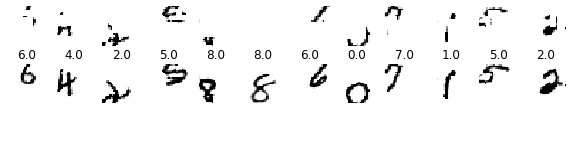

Custom Loss: 0.0


In [105]:
z = torch.rand(size=(len(real_imgs), 100))
# z = torch.ones(size=(len(real_imgs), 100))
generated = gen(cut_imgs, labels, z)
print(generated.shape)
fig, axes = plt.subplots(3, 12, figsize=(10,3))
for y in range(12):
    axes[0, y].imshow(cut_imgs[0 + y].view(28,28), cmap="Greys")
    axes[0, y].axis('off')
#     axes[1, y].imshow(class_imgs[0 + y].view(28,28), cmap="Greys")
#     axes[1, y].axis('off')
    axes[1, y].imshow(generated[0 + y].detach().view(28,28), cmap="Greys")
    axes[1, y].axis('off')
    axes[1, y].set_title(labels[0 + y].item())
    axes[2, y].imshow(nn.functional.relu(cut_imgs[0 + y].view(28,28) - 1 * generated[0 + y].detach().view(28,28)), cmap="Greys")
    axes[2, y].axis('off')
    
plt.show()
print('Custom Loss:', base_loss(generated, cut_imgs).item())
# print('Discriminator Loss:', nn.BCELoss()(fake_predictions, torch.ones_like(fake_predictions)).item())

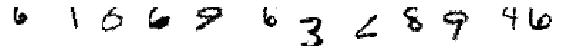

95 -------------------------------------------


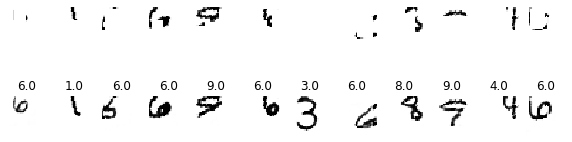

96 -------------------------------------------


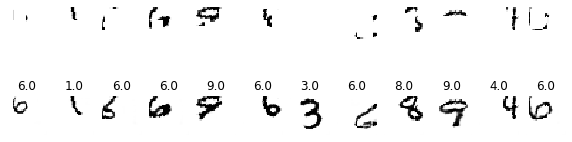

97 -------------------------------------------


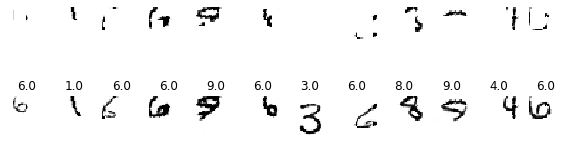

98 -------------------------------------------


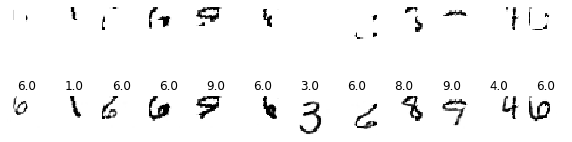

99 -------------------------------------------


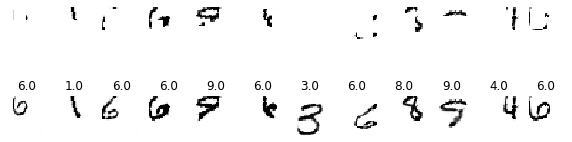

In [131]:
real_imgs, cut_imgs, labels = next(iter(dataloader))
labels = labels.float().view(-1, 1)
fig, axes = plt.subplots(1, 12, figsize=(10,3))
for i in range(12):
    axes[i].imshow(real_imgs[i].view(28,28), cmap="Greys")
    axes[i].axis('off')
plt.show()
for i in range(95, 100, 1):
    gen = Add_Skip_Generator()
    disc = Discriminator()
    gen.load_state_dict(torch.load('models/addition_of_input/gen_{}.pt'.format(i)))
    gen.eval()
#     gen.apply(test_dropout)
#     disc.load_state_dict(torch.load('models/new_dropout/disc_{}.pt'.format(i)))
#     disc.eval()
    
    z = torch.rand(size=(len(real_imgs), 100))
    generated = gen(cut_imgs, labels, z)
    fig, axes = plt.subplots(2, 12, figsize=(10,3))
    for y in range(12):
        axes[0, y].imshow(cut_imgs[y].view(28,28), cmap="Greys")
        axes[0, y].axis('off')
    #     axes[1, y].imshow(class_imgs[0 + y].view(28,28), cmap="Greys")
    #     axes[1, y].axis('off')
        axes[1, y].imshow(generated[y].detach().view(28,28), cmap="Greys")
        axes[1, y].axis('off')
        axes[1, y].set_title(labels[y].item())
#     print(disc(generated, labels).mean())
    print(str(i) + ' -------------------------------------------')
    plt.show()
        

In [111]:
def complete_sketch(gen, sketch, c):
#     class_data = data.class_data[c]
#     class_img = class_data[torch.randint(0, data.class_lengths[c], (1,))]
    z = torch.rand((1, 1, 100)) 
#     plt.imshow(class_img.view(28,28), cmap="Greys")
#     plt.plot()
    
    completed_sketch = gen(sketch.view(1, 1, 28, 28), torch.Tensor([c]).float().view(1, 1), z)
    return completed_sketch

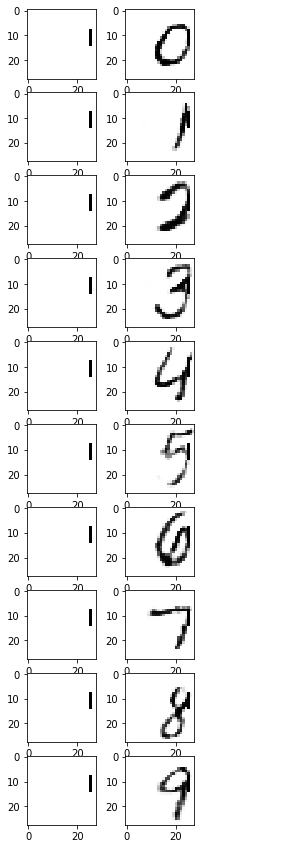

In [129]:
# human-drawn sketch completion example
gen = Add_Skip_Generator()
gen.load_state_dict(torch.load('models/addition_of_input/gen_99.pt'.format(i)))
gen.eval()
# gen.apply(test_dropout)
sketch = transforms.ToTensor()(Image.open('sketch.png').convert('L'))
# sketch = cut_imgs[2]
# print(sketch.shape)
# completed_sketch = complete_sketch(gen, sketch, 9)
fig, axes = plt.subplots(10, 3, figsize=(5, 15))
for i in range(10):
    completed_sketch = complete_sketch(gen, sketch, i)
    axes[i,0].imshow(sketch.view(28,28), cmap="Greys")
    axes[i,0].axis('on')
    axes[i,1].imshow(completed_sketch.detach().view(28,28), cmap="Greys")
    axes[i,1].axis('on')
    axes[i,2].imshow(nn.functional.relu(sketch.view(28,28) - 3 * completed_sketch.detach().view(28,28)), cmap="Greys")
    axes[i,2].axis('off')
# axes[2].imshow(generated[0].detach().view(28,28), cmap="Greys")
# axes[2].axis('off')

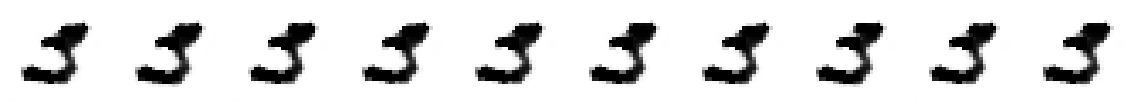

In [127]:
# interpolation example
gen = Add_Skip_Generator()
gen.load_state_dict(torch.load('models/addition_of_input/gen_99.pt'.format(i)))
gen.eval()
# gen.apply(test_dropout)

real_imgs, cut_imgs, labels = next(iter(dataloader))
labels = labels.float().view(-1, 1)

z1 = torch.rand(size=(len(real_imgs), 100))
z2 = torch.rand(size=(len(real_imgs), 100))
# generated1 = gen(cut_imgs, labels, z1)[0]
# generated2 = gen(cut_imgs, labels, z2)[0]

fig, axes = plt.subplots(1, 10, figsize=(20, 10))
for i, t in enumerate(np.arange(0, 1, 0.1)):
    z_interpolation = t * z1 + (1-t) * z2
    generated = gen(cut_imgs, labels, z_interpolation)[0]
    
#     interpolation = t * generated1 + (1-t) * generated2
    axes[i].imshow(generated.view(28,28).cpu().detach(), cmap="Greys")
    axes[i].axis('off')
plt.show()